<a href="https://colab.research.google.com/github/HardikZala/Data-Analysis/blob/main/Portfolio_Risk_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Web scrape yahoo finance, based on stock ticker that the user enters
# create portfolio with all the stock information, and portfolio weights
# calculate and generate dashboard to display portfolio risk
# BONUS: compare portfolios to other portfolios with similar risk and returns
# BONUS: ADD crypto into the portfolio: CHALLANGE: cryoti trades 7 days a week, stock markets trade 5 days a week:
  #possible solution: make stock null values friday close value: possibly change trading days to 365 from 253(yearly trading days) 

In [2]:
!pip install bs4
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import re
import json
import csv
from io import StringIO
from bs4 import BeautifulSoup
import requests

In [4]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 6.4 MB 38.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [5]:
import yfinance as yf

In [6]:
#Populate portfolio with stocks 
print('enter stock ticker')
print('press q to quit')
stocks_list = set()
weight = np.array([])
companies = {}
while True:                               #While Loop to get user's stock Tickers
    stock = str.upper(input())
    if str.upper(stock) == 'Q':
        break
    stocks_list.add(stock)             # store input in stocks_list 

for stock in stocks_list:                 # for loop to call yfinance api to get stock closing prices
  prices = yf.Ticker(stock)
  prices = prices.history(period ='5y')
  companies[stock] = prices                     
  companies[stock] = companies[stock]['Close']  # added a companies dictionary to get stock name and price

portfolio = pd.concat(companies, axis = 1)  # concat all the stock prices into one data frame called portfolio
portfolio

enter stock ticker
press q to quit
aapl
pfe
amzn
googl
q


,GOOGL,AMZN,PFE,AAPL
Date,,,,
2017-06-07,1001.500000,50.503502,25.245651,36.770878
2017-06-08,1004.280029,50.513500,25.048422,36.680943
2017-06-09,970.119995,48.915501,25.853121,35.258579
2017-06-12,961.809998,48.245499,25.797894,34.416050
2017-06-13,970.500000,49.039501,25.703222,34.692947
...,...,...,...,...
2022-05-31,2275.239990,120.209503,53.040001,148.839996
2022-06-01,2277.840088,121.683998,52.369999,148.710007
2022-06-02,2352.449951,125.511002,52.680000,151.210007


In [7]:
# Get user input for portfolio weights
initial_weight = {} 
keys = portfolio.shape[1]
weight_list = []
x = list(stocks_list)

for i in range(keys):
    print('For stock:',x[i]) 
    weight = float(input('enter 0.XXXX format portfolio weights:'))
    if i <= keys:
      weight_list.append(weight)
      k = x[i]
      initial_weight[k] = weight_list[i]
    else:
      break 

For stock: GOOGL
enter 0.XXXX format portfolio weights:0.25
For stock: AMZN
enter 0.XXXX format portfolio weights:0.25
For stock: PFE
enter 0.XXXX format portfolio weights:0.25
For stock: AAPL
enter 0.XXXX format portfolio weights:0.25


In [8]:
initial_weight

{'AAPL': 0.25, 'AMZN': 0.25, 'GOOGL': 0.25, 'PFE': 0.25}

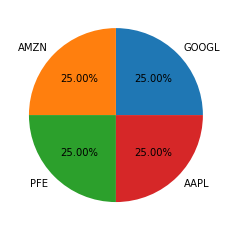

In [9]:
import matplotlib.pyplot as plt

labels = list(initial_weight.keys())
values = list(initial_weight.values())

plt.pie(values,labels = labels, autopct='%1.2f%%')
plt.show()

In [10]:
portfolio

,GOOGL,AMZN,PFE,AAPL
Date,,,,
2017-06-07,1001.500000,50.503502,25.245651,36.770878
2017-06-08,1004.280029,50.513500,25.048422,36.680943
2017-06-09,970.119995,48.915501,25.853121,35.258579
2017-06-12,961.809998,48.245499,25.797894,34.416050
2017-06-13,970.500000,49.039501,25.703222,34.692947
...,...,...,...,...
2022-05-31,2275.239990,120.209503,53.040001,148.839996
2022-06-01,2277.840088,121.683998,52.369999,148.710007
2022-06-02,2352.449951,125.511002,52.680000,151.210007


In [11]:
portfolio.describe()

,GOOGL,AMZN,PFE,AAPL
count,1259.000000,1259.000000,1259.000000,1259.000000
mean,1589.186958,112.871398,35.417587,84.423397
std,634.909837,41.375810,7.229971,45.983800
min,919.460022,46.930000,24.853760,33.670555
25%,1109.775024,82.955750,29.956088,44.233175
50%,1265.229980,95.622498,33.910912,63.907669
75%,2063.500000,158.086998,36.967358,126.737251
max,2996.770020,186.570496,60.296108,181.511703


**COVARIANCE MATRIX**

In [12]:
# Calculate log returns
log_returns = np.log(portfolio).diff().dropna()
log_returns

,GOOGL,AMZN,PFE,AAPL
Date,,,,
2017-06-08,0.002772,0.000198,-0.007843,-0.002449
2017-06-09,-0.034606,-0.032146,0.031620,-0.039548
2017-06-12,-0.008603,-0.013792,-0.002138,-0.024186
2017-06-13,0.008994,0.016324,-0.003676,0.008013
2017-06-14,-0.002652,-0.004414,0.003371,-0.009803
...,...,...,...,...
2022-05-31,0.012788,0.043031,-0.016270,-0.005361
2022-06-01,0.001142,0.012191,-0.012712,-0.000874
2022-06-02,0.032230,0.030966,0.005902,0.016671


In [13]:
# Calculate covariance matrix
cov_matrix = log_returns.cov()
cov_matrix

,GOOGL,AMZN,PFE,AAPL
GOOGL,0.000333,0.000254,0.000095,0.000251
AMZN,0.000254,0.000433,0.000072,0.000266
PFE,0.000095,0.000072,0.000248,0.000102
AAPL,0.000251,0.000266,0.000102,0.000403


In [14]:
avg_returns=log_returns.mean()
avg_returns = pd.DataFrame(avg_returns)
avg_returns.columns = ['average 5 year returns']

# **ALPHA AND BETA**

In [15]:
# alpha compares the returns to a benchmark index such as S&P 500
# positive means outperformed, negative means underperform

# beta measures volatility compared to benchmark index
# the higher the beta the more volatile your stock

In [16]:
# Import S&P500 index(^GSPC)
m  = yf.Ticker('^GSPC')
m = m.history(period ='5y') # Market index
m = pd.DataFrame(m)
portfolio_m = pd.merge(m['Close'],portfolio, how = 'outer', on = 'Date')
portfolio_m.rename(columns = {'Close':'Index:^GSPC'}, inplace = True)
portfolio_m_log = np.log(portfolio_m).diff().dropna()

In [17]:
portfolio_m_log

,Index:^GSPC,GOOGL,AMZN,PFE,AAPL
Date,,,,,
2017-06-08,0.000267,0.002772,0.000198,-0.007843,-0.002449
2017-06-09,-0.000830,-0.034606,-0.032146,0.031620,-0.039548
2017-06-12,-0.000979,-0.008603,-0.013792,-0.002138,-0.024186
2017-06-13,0.004501,0.008994,0.016324,-0.003676,0.008013
2017-06-14,-0.000996,-0.002652,-0.004414,0.003371,-0.009803
...,...,...,...,...,...
2022-05-31,-0.006294,0.012788,0.043031,-0.016270,-0.005361
2022-06-01,-0.007511,0.001142,0.012191,-0.012712,-0.000874
2022-06-02,0.018263,0.032230,0.030966,0.005902,0.016671


In [18]:
#get mean returns
portfolio_m_avg_return = portfolio_m_log.mean()
pd.DataFrame(portfolio_m_avg_return)
portfolio_m_avg_return.columns = ['Average Portfolio Returns']
portfolio_m_avg_return

Index:^GSPC    0.000419
GOOGL          0.000673
AMZN           0.000719
PFE            0.000593
AAPL           0.001097
dtype: float64

In [19]:
#CAPM beta coefficient
import numpy as np
def calc_beta(df):
  np_array = df.values
  m = np_array[:,0]
  beta = [] 
  for ind, col in enumerate(df):
    if ind > 0:
      s = np_array[:,ind]
      covariance = np.cov(s,m)
      beta.append(covariance[0,1]/covariance[1,1])
  return pd.Series(beta, portfolio.columns, name = 'Beta')

In [20]:
calc_beta(portfolio_m_log)

GOOGL    1.110289
AMZN     1.026582
PFE      0.607019
AAPL     1.217146
Name: Beta, dtype: float64

In [21]:
# BETA USING LINEAR REGRESSION
from scipy import stats

portfolio_m = pd.merge(m['Close'],portfolio, how = 'outer', on = 'Date')
portfolio_m.rename(columns = {'Close':'Index'}, inplace = True)

def calc_reg_beta(df):
  np_array = df.values
  m = np_array[:,0]
  beta = [] 
  for ind, col in enumerate(df):
    if ind > 0:
      s = np_array[:,ind]
      beta.append(stats.linregress(m,s)[0]) # use linear regression to find beta
  return pd.Series(beta, portfolio.columns, name = 'Beta')


In [22]:
calc_reg_beta(portfolio_m_log)

GOOGL    1.110289
AMZN     1.026582
PFE      0.607019
AAPL     1.217146
Name: Beta, dtype: float64

In [23]:
def matrix_beta(df):
  X = df.values[:,[0]]
  X = np.concatenate([np.ones_like(X), X], axis=1)  # add column for intercept(values as 1's)
  beta = np.linalg.pinv(X.T @ X) @ X.T @ df.values[:,1:] #apply matrix algebra for linear regression closed for solution
  return pd.Series(beta[1], df.columns[1:], name='Beta')

In [24]:
matrix_beta(portfolio_m_log)

GOOGL    1.110289
AMZN     1.026582
PFE      0.607019
AAPL     1.217146
Name: Beta, dtype: float64

In [25]:
# Get first date of historical value
# index/string slicing

date = portfolio.index.values[0]  # get first date
date = date.astype(str)
date = date[:10]
print(date)

2017-06-07


In [26]:
# import Risk Free Rate T-Bills 5 years

from bs4 import BeautifulSoup
import requests

html = requests.get('https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_bill_rates&field_tdr_date_value=2017')
soup = BeautifulSoup(html.text, "html.parser")

table = soup.find('table', class_ = 'views-table views-view-table cols-19' )

for t in table.find_all('tbody'):
  rows = t.find_all('tr')
  for row in rows:
    date = row.find_all('td',class_= "views-field views-field-field-tdr-date")
    coupon = row.find_all('td',class_ = 'views-field views-field-field-br-round-b1-close-13wk-2')

tbill = date + coupon

**SCRAPE TREASURY BILL DATA**

In [27]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
row_data = []
year = 2017 
while True:
  url = 'https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_bill_rates&field_tdr_date_value='+ str(year)
  html = requests.get(url)
  soup = bs(html.text,'html.parser')
  table = soup.find('table', class_ = 'views-table views-view-table cols-19' )
    
  for row in table.find_all('tr'):
    col = row.find_all('td')
    col = [ele.text.strip() for ele in col]
    row_data.append(col)
  
  url = 'https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_bill_rates&field_tdr_date_value='
  year = year + 1
  year = str(year)
  url = url + year
  year = int(year)

  if year == 2023:
   break

In [28]:
# change url to get each new year. # Implimented into the web scrape cell above
# convert to string and revert to int for string addition, and adding respectively
year = 2017
for y in range(year):
  url = 'https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_bill_rates&field_tdr_date_value='
  year = year + 1
  year = str(year)
  url = url + year
  year = int(year)
  if year == 2022:
    break

In [29]:
# Web Scrape Headers
header = []
for i in soup.find_all('th'):
  col_name = i.text.strip().lower().replace(" ","_")
  header.append(col_name)
header

['date',
 '20_yr',
 '30_yr',
 'extrapolation_factor',
 '4_weeks_bank_discount',
 'coupon_equivalent',
 '8_weeks_bank_discount',
 'coupon_equivalent',
 '13_weeks_bank_discount',
 'coupon_equivalent',
 '26_weeks_bank_discount',
 'coupon_equivalent',
 '52_weeks_bank_discount',
 'coupon_equivalent',
 '1_mo',
 '2_mo',
 '3_mo',
 '20_yr',
 '30_yr']

**DATA NORMALIZATION/CLEANING**

In [30]:
# We need only 5 years or 1259 rows of data
len(row_data)

1364

In [34]:
# convert 13 week tbill rate to float type, and get only last 5 years of data
result = pd.DataFrame(row_data, columns = header)
tbill = result.iloc[-1259:,[0,9]]
tbill['coupon_equivalent'].astype(float)

105     0.98
106     0.97
107     0.98
108     1.00
109     1.01
        ... 
1359    1.15
1360    1.14
1361    1.15
1362    1.19
1363    1.25
Name: coupon_equivalent, Length: 1259, dtype: float64

In [36]:
# find data types
tbill.dtypes

date                 object
coupon_equivalent    object
dtype: object

In [37]:
#convert coupon_equivalent column to float
tbill['coupon_equivalent'] = tbill['coupon_equivalent'].astype(float)
tbill.dtypes

date                  object
coupon_equivalent    float64
dtype: object

In [38]:
#avg tbill yearly
rfr_avg = tbill['coupon_equivalent'].mean()
rfr_avg = rfr_avg/100 #Current value is in percent. Need decimal
rfr_avg

0.010718979266347517

**CAPITAL ASSET PRICING MODEL**

In [39]:
portfolio_m_avg_return

Index:^GSPC    0.000419
GOOGL          0.000673
AMZN           0.000719
PFE            0.000593
AAPL           0.001097
dtype: float64

In [50]:
# Calculate weight of portfolio per stock average return
portfolio_m_avg_return_df = portfolio_m_avg_return.to_frame()
portfolio_m_avg_return_df = portfolio_m_avg_return_df.iloc[1:,] 

df1 = portfolio_m_avg_return_df.assign(**initial_weight).mul(portfolio_m_avg_return_df)
df1 = df1[0].sum()

In [49]:
# Beta
beta = calc_reg_beta(portfolio_m_log)
beta

GOOGL    1.110289
AMZN     1.026582
PFE      0.607019
AAPL     1.217146
Name: Beta, dtype: float64

In [42]:
#CAPM capital asset pricing model
rfr = rfr_avg
market_return = ((1 + portfolio_m_avg_return[0])**365) - 1
beta = calc_reg_beta(portfolio_m_log)
expected_return = rfr + beta*(market_return - rfr)
expected_return

GOOGL    0.182219
AMZN     0.169289
PFE      0.104482
AAPL     0.198725
Name: Beta, dtype: float64

**JENSEN'S ALPHA**

In [51]:
#import libraries
import statsmodels.regression.linear_model as lm
import statsmodels.tools.tools as ct

In [105]:
portfolio_mean = portfolio.pct_change()   # Get pct change
portfolio_mean.dropna(inplace = True)
portfolio_mean = portfolio_mean.mean()    # Get avg pct change
portfolio_mean = portfolio_mean.to_frame()
weighted_return = portfolio_mean.mul(pd.Series(initial_weight), axis = 0) # get weighted returns
portfolio_ret = np.sum(weighted_return) # Get total portfolio returns
portfolio_ret

0    0.000948
dtype: float64

**PORTFOLIO STANDARD DEVIATION**

In [116]:
p_std = portfolio.std()
p_mean = portfolio.mean() 
p_cov = p_std/p_mean
p_cov

GOOGL    0.399519
AMZN     0.366575
PFE      0.204135
AAPL     0.544681
dtype: float64

**R-SQUARED MODEL**

In [43]:
#R-Squared


In [45]:
#Sharpe Ratio

In [46]:
#Efficient Frontiers



In [47]:
#Value at Risk

In [48]:
#The Bottom Line

In [ ]:
# MONTE CARLO SIMULATION